# AUTHOR
***Written by Ho Sy The***

Hanoi University of Science and Technology

IT1 04 - K65.

*Github: https://github.com/hsthe29*

- **date: 2022-05-19**

# SUMMARY

**Gradient Descent approach (Newton Optimization)**
## Loss function in feature space

- $\mathbf{x} \in \mathbf{R}^{d_1} ~ → ~ \phi(x) \in \mathbf{R}^{d_2}$
- Back to the primal SVM problem:

$~~~~~L(\mathbf{w}, b) = \frac{||\mathbf{w}||^2_2}{2} + C \sum_{i=1}^n max \bigg ( 0, 1- y_i ( \mathbf{w}^Tx_i+b) \bigg ) $

- In feature space:

$~~~~~L(\mathbf{\beta}, b) = \frac{||\beta||^2_2}{2} + C \sum_{i=1}^n max \bigg ( 0, 1- y_i ( \beta^T\phi(x_i)+b) \bigg ) $
- The hinge loss get by dividing both sides by C and set 1/C = $λ$

- In feature space, let $β \in \mathbf{R}^{d_2}$ is weight and $λ_i$ is coefficient of the point $\phi(x_i)$.
 - Formula: $\beta = \sum_{i = 1}^n\lambda_i\phi(x_i)$
 - Or: $β = \phi(\mathbf{X})λ$

- So by replacing the $β$
 in the loss function and introducing feature space $\phi$ we can rewrite the equation as:
 $\begin{align}
L & = \frac{ 1 }{2} \beta^T\beta + C \sum_{i=1}^n max \bigg ( 0, 1- y_i ( \beta^T\phi(x_i)+b) \bigg ) \\
& = \frac{ 1 }{2} (\phi(\mathbf{X})\lambda)^T(\phi(\mathbf{X})\lambda) + C \sum_{i=1}^n max \bigg ( 0, 1- y_i ((\phi(\mathbf{X})\lambda)^T\phi(x_i)+b) \bigg ) \\
& = \frac{ 1 }{2} \lambda^T\phi(\mathbf{X})^T\phi(\mathbf{X})\lambda + C \sum_{i=1}^n max \bigg ( 0, 1- y_i (\lambda^T\phi(\mathbf{X})\phi(x_i)+b) \bigg ) \\
& = \frac{ 1 }{2} \lambda^Tk(\mathbf{X},\mathbf{X}^T) \lambda + C \sum_{i=1}^n max \bigg ( 0, 1- y_i (\lambda^Tk(\mathbf{X},x_i)+b) \bigg ) \\
\end{align}$

## Update rule

$\mathcal{H} = \{n: 1- y_n (\lambda^Tk(\mathbf{X},x_n)+b > 0)\}$

$\begin{align}
\require{cancel}
\frac{\delta L}{\delta \lambda} & = k(\mathbf{X},\mathbf{X}^T)  \lambda – C \sum_{i \in \mathcal{H}} y_i k(\mathbf{X},x_i) ~~~\text{because} k(\mathbf{X},\mathbf{X}^T)  \text{  is symmetric matrix}\\
\frac{\delta L}{\delta b} & = – C \sum_{i \in \mathcal{H}} y_i  
\end{align}$

## Compute the predicted output
predicted output: 

$~~~~\begin{align}
\hat{y} & = \text{sign}( \beta^T\phi(x) +b ) \\
& = \text{sign}( (\phi(\mathbf{X})\lambda)^T\phi(x) +b ) \\
& = \text{sign}( \lambda^T \phi(\mathbf{X})^T\phi(x) +b ) \\
& = \text{sign}( \lambda^T k(\mathbf{X},x) +b ) \\
\end{align}$

In [2]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler


In [ ]:
# check gradient

N0 = 5
b0 = 4
X_check = np.random.randint(1, 20, (2, 2*N0))
y_check = np.array([[1] * N0 + [-1] * N0])
K_c = X_check.T @ X_check

C_c = 4
Z_c = y_check * K_c

def cost(w):
  u = y_check * (w.T @ K_c + b0)
  return .5 * w.T @ K_c @ w + C_c * np.sum(np.maximum(0, 1 - u))

def grad(w):
  u = y_check * (w.T @ K_c + b0)
  H = np.where(u < 1)[1]
  ZS = Z_c[:, H]
  return K_c @ w - C_c * np.sum(ZS, axis=1, keepdims = True)

eps = 1e-5
def num_grad(w):
  g = np.zeros_like(w)
  for i in range(len(w)):
    wp = w.copy()
    wm = w.copy()
    wp[i] += eps 
    wm[i] -= eps 
    g[i] = (cost(wp) - cost(wm))/(2*eps)
  return g

w0 = np.random.rand(2 *N0, 1)

g1 = grad(w0)
print('g1 = ', g1.T)
g2 = num_grad(w0)
print('g2 = ', g2.T)
diff = np.linalg.norm(g1 - g2)
print('Gradient different: %f' %diff)

g1 =  [[ 3595.14710333  3986.24267375  3282.59644083  4963.16711521
   8479.76931062 10590.70800938  9497.59517524  9692.32847585
   5236.44532375 10708.52537127]]
g2 =  [[ 3595.14710326  3986.24267364  3282.59644084  4963.16711506
   8479.76931072 10590.70800911  9497.59517534  9692.32847565
   5236.44532404 10708.52537123]]
Gradient different: 0.000001


In [87]:
# check gradient
def rbf1(X1, X2):
  d, n = X1.shape
  _, n2 = X2.shape
  ans = np.zeros((n,  n2))
  one1 = np.ones((1, n))
  one2 = np.ones((1, n2))
  for i in range(d):
    v1 = X1[i].reshape(n, 1)
    t1 = v1 @ one2
    v2 = X2[i].reshape(n2, 1)
    t2 = v2 @ one1
    ans += (t1 - t2.T) ** 2

  return np.exp(-4 * ans)

def rbf2(X1, X2):
  d, n = X1.shape
  _, n2 = X2.shape
  X1_ = X1.reshape(d, n, 1)
  X2_ = X2.reshape(d, n2, 1)
  one1 = np.ones((d, 1, n))
  one2 = np.ones((d, 1, n2))
  ans = X1_ @ one2 - (X2_ @ one1).transpose(0, 2, 1)
  ans = ans ** 2
  return np.exp(-4 * np.sum(ans, axis=0))

X1_c = np.random.rand(2, 10)
X2_c = np.random.rand(2, 5)

r1 = rbf1(X1_c, X2_c)
r2 = rbf2(X1_c, X2_c)

print('gradient different: ', np.linalg.norm(r1 - r2))

gradient different:  0.0


In [92]:
class PrimalSVM:
  def __init__(self, kernel='rbf', learning_rate=1e-3, C=1e5, degree=3, gamma=1, coeff=0):
    self.__kernels = {'linear': lambda x, y: self.__linear_kernel_(x, y),
             'poly': lambda x, y: self.__polynomial_kernel_(x, y),
             'sigmoid': lambda x, y: self.__sigmoid_kernel_(x, y),
             'rbf': lambda x, y: self.__rbf_kernel_(x, y)}
    if kernel not in self.__kernels.keys():
      raise ValueError('kernel is not accepted!')
    self.__kernel= kernel
    self.lr = learning_rate
    self.__C = C
    self.co = 1 / C
    self.__degree = degree
    self.__gamma = gamma
    self.__coeff = coeff

  def __linear_kernel_(self, X1, X2):
    return X1.T @ X2 # [N, N]

  def __polynomial_kernel_(self, X1, X2):
    x = X1.T @ X2 # [N, N]
    return (self.__gamma * x + self.__coeff) ** self.__degree

  def __sigmoid_kernel_(self, X1, X2):
    x = X1.T @ X2 # [N, N]
    return np.tanh(self.__gamma * x + self.__coeff)

  def __rbf_kernel_(self, X1, X2):
    d, n = X1.shape
    _, n2 = X2.shape
    X1_ = X1.reshape(d, n, 1)
    X2_ = X2.reshape(d, n2, 1)
    one1 = np.ones((d, 1, n))
    one2 = np.ones((d, 1, n2))
    ans = (X1_ @ one2 - (X2_ @ one1).transpose(0, 2, 1)) ** 2 
    return np.exp(-self.__gamma * np.sum(ans, axis=0))

  def fit(self, X, y, batch_size=0, epochs=100001, show_result=False):
    # if batch_size is 0, this case is SGD
    if batch_size == 0:
      batch_size = X.shape[1]
    else:
      if X.shape[1] % batch_size != 0:
        raise ValueError('number of data points must be divisible by batch_size!')
    self.epochs = epochs
    self.classes = np.unique(y)
    if len(self.classes) != 2:
      raise ValueError('Number of classed must be 2!')

    self.X = X
    self.y = y
    self.y[self.y == self.classes[0]] = -1
    self.y[self.y == self.classes[1]] = 1
    self.lambda_ = np.random.rand(X.shape[1], 1) # [n, 1]
    self.b_ = 0
    self.loss_ = []

    # build K - Kernel matrix
    K = self.__kernels[self.__kernel](X, X)
    Z = y * K
    iter_per_epoch = X.shape[1] // batch_size
    # mini-batch gradient descent
    for _ in range(self.epochs):
      mix_id = np.random.permutation(X.shape[1])
      for i in range(iter_per_epoch):
        id = mix_id[range(i * batch_size, (i + 1) * batch_size)]
        K1 = K[id][:, id]
        y_id = y[:, id]
        Z_id = Z[id][:, id]
      
        u = y_id * (self.lambda_[id].T @ K1 + self.b_)
        H = np.where(u < 1)[1]
        
        ZS = Z_id[:, H]
        dl = K1 @ self.lambda_[id] - self.__C * np.sum(ZS, axis=1, keepdims = True)
        db = -self.__C * np.sum(y_id[0, H])

        # update
        self.lambda_[id] -= self.lr * dl
        self.b_ -= self.lr * db
      u = y * (self.lambda_.T @ K + self.b_)
      loss = .5 * self.lambda_.T @ K @ self.lambda_ + self.__C * np.sum(np.maximum(0, 1 - u))
      self.loss_.append(loss[0, 0])
    
    if show_result:
      plt.figure(figsize=(20, 8))
      plt.plot(self.loss_, 'b', linewidth=2)
      plt.plot(self.loss_, 'ro', markersize=5)
      plt.title('loss - epochs')
      plt.xlabel('epochs')
      plt.ylabel('loss value')
      plt.show()
      print('λ.T: ')
      print(self.lambda_.T)
    self.support_vectors_ = np.where(u <= 1)[1]

  def decision_function(self, X):
    return self.lambda_.T @ self.__kernels[self.__kernel](self.X, X) + self.b_

  def predict(self, X, keepclass=False):
    ans = np.sign(self.decision_function(X))
    ans[ans == 0] = 1
    if keepclass:
      ans[ans == -1] = self.classes[0]
      ans[ans == 1] = self.classes[1]
    return ans
  def visualize(self, x_axis, y_axis, n_=500, level_sets=200, dpi=100, style=1):
    plt.figure(dpi=dpi)

    x_ = np.linspace(x_axis[0], x_axis[1], n_)
    y_ = np.linspace(y_axis[0], y_axis[1], n_)
    l = len(x_)
    x_, y_ = np.meshgrid(x_, y_)

    xx = x_.reshape(-1)
    yy = y_.reshape(-1)
    x = np.vstack((xx, yy))
    z = self.decision_function(x)
    z = z.reshape(l, l)

    if style == 1:
      plt.contourf(x_, y_, np.sign(z), level_sets, cmap='jet', alpha = .3)
      X_1 = self.X[:, self.y[0] == -1]
      X_2 = self.X[:, self.y[0] == 1]
      plt.plot(X_1[0], X_1[1], 'ro', markersize=8) #, markeredgecolor='k')
      plt.plot(X_2[0], X_2[1], 'bs', markersize=8) #, markeredgecolor='k')
      y_sp = self.y[0, self.support_vectors_]
      x0_sp = (self.X[:, self.support_vectors_])[:, y_sp == -1]
      x1_sp = (self.X[:, self.support_vectors_])[:, y_sp == 1]
      plt.scatter(x0_sp[0], x0_sp[1], s=100,
                   linewidth=1, marker='o', facecolors='none', edgecolors='k')
      plt.scatter(x1_sp[0], x1_sp[1], s=100,
                   linewidth=1, marker='s', facecolors='none', edgecolors='k')
    else:
      plt.contour(x_, y_, z, colors=['b', 'g', 'r'], levels=[-1, 0, 1], alpha=0.5,
                   linestyles=['--', '-', '--'], linewidths=[2.0, 2.0, 2.0])
      yc = np.copy(self.y)
      yc[yc == -1] = 0
      plt.scatter(self.X[0], self.X[1], c=yc[0], s=50, cmap=plt.cm.Paired, alpha=.8)
      plt.scatter(self.X[0][self.support_vectors_], self.X[1][self.support_vectors_], s=100,
                   linewidth=1, facecolors='none', edgecolors='k')
    plt.axis('tight')

    plt.contour(x_, y_, z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],
                levels=[-.5, 0, .5])

    plt.show()



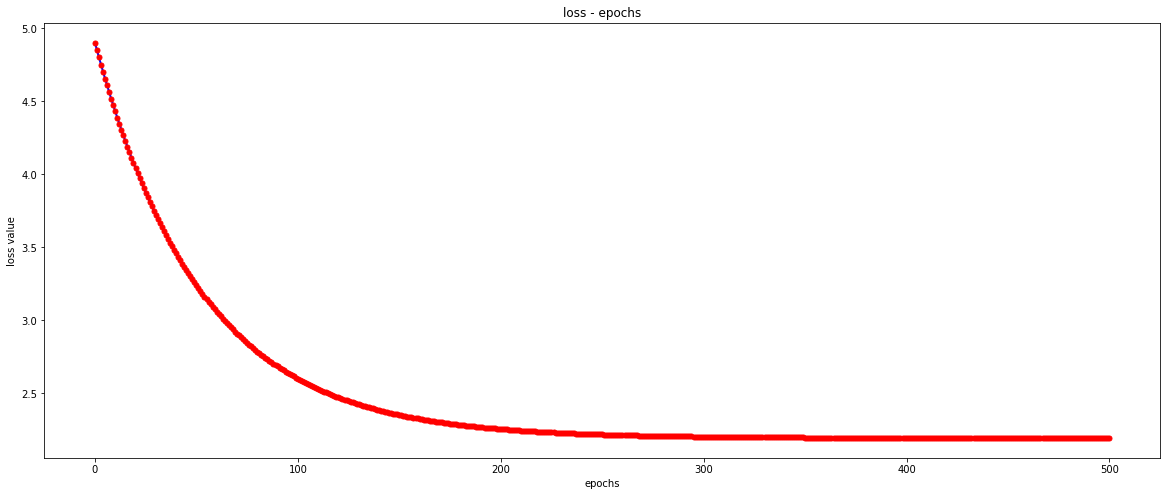

λ.T: 
[[-0.98712341  0.99340909  0.98807394 -0.98643187]]


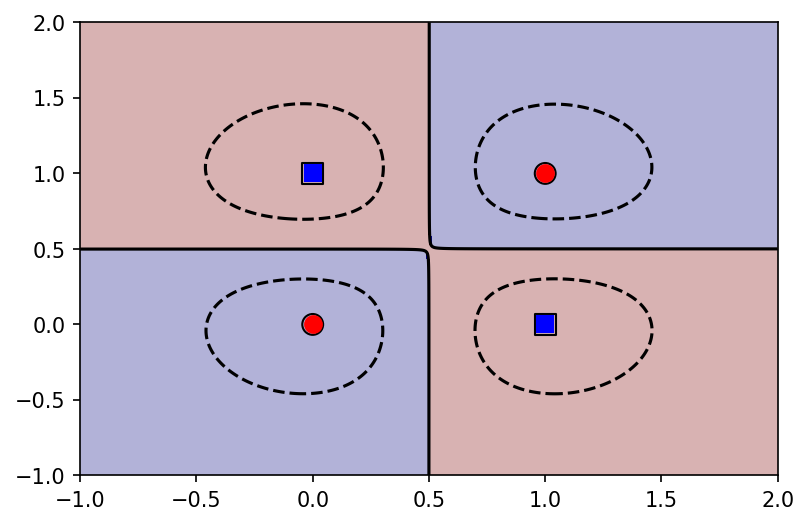

In [96]:
X = np.array([[0, 0],
             [0, 1],
             [1, 0],
             [1, 1]], dtype='float64').T
y = np.array([[-1, 1, 1, -1]], dtype='float64')

ksvm = PrimalSVM(kernel='rbf',C = 1.0, learning_rate=1e-2, gamma=3, coeff=0)

ksvm.fit(X, y, epochs=501, show_result=True)
ksvm.visualize([-1, 2], [-1, 2], dpi=150)

In [98]:
print(ksvm.loss_[-1])

2.1944348033161196


# Moon dataset 

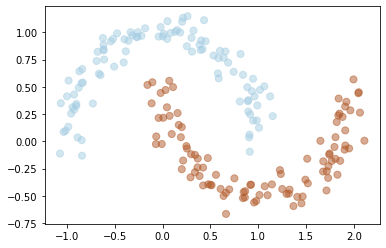

In [99]:
def make_data(n_samples, noise=0.1):
  noisy_moons = datasets.make_moons(n_samples=n_samples, noise=noise, random_state=6)
  return noisy_moons[0], noisy_moons[1]


n_data = 200
X2, y2 = make_data(n_data)
X2 = X2.T
y2 = y2.reshape(1, n_data)

y2 = y2.astype(float)

plt.scatter(X2[0], X2[1], c=y2, s=50, cmap=plt.cm.Paired, alpha=.5)
plt.show()


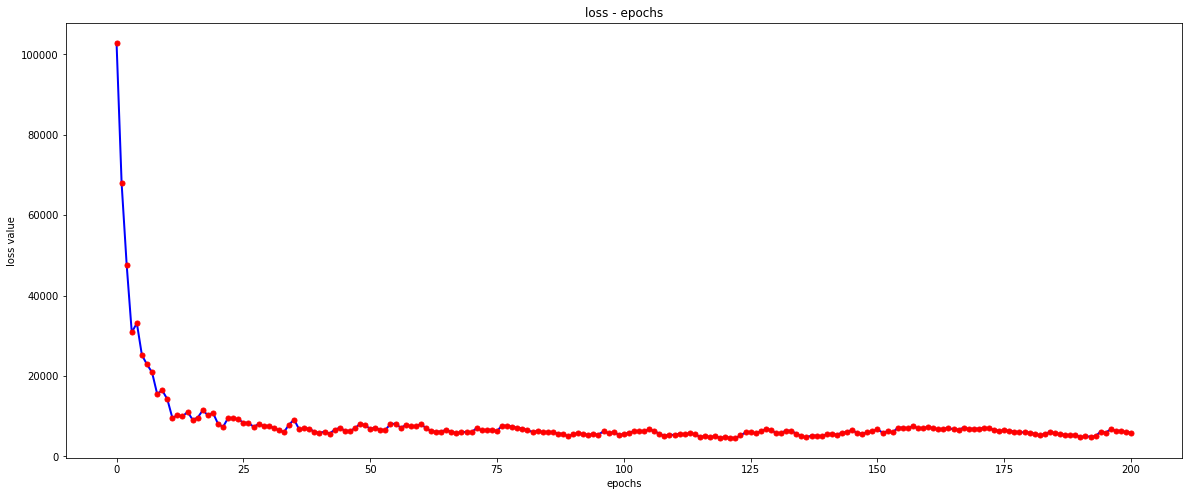

λ.T: 
[[ 2.06679978 -1.49045479  1.34848406  0.73842806  1.31894075  1.48163762
  -0.8406335  -1.25999021 -2.00282894 -1.04476797  1.0902507  -1.05396484
  -1.1616628  -0.63138606  1.19579838  1.4808251  -1.08545032  1.95290749
   0.96182253 -1.18565378 -2.22242705 -1.15687908 -0.84664535  0.741943
  -0.75597817 -0.50996839 -0.7668774   1.59113837 -0.86889516  0.85517919
   1.43972025 -0.57218851 -1.02392254 -1.50400916 -0.55172373 -1.678054
   0.49583363  0.8309157   1.41736232  0.74245949 -2.22496336 -0.82206276
  -0.82593097  1.73237777 -1.27496889  0.96541144  1.03092913 -1.26223224
  -1.05948178  1.74177833 -0.82258101  2.14167779  1.35206882 -0.4430797
  -0.98885291  0.76285164  1.12909733  0.90015616 -1.25381421  0.9391563
  -0.65080152 -1.08061092  1.4151391  -0.86250532 -1.15943681 -0.98558643
   0.71860375  1.73252968 -0.6799893   1.70518217 -0.86206061  1.25413892
  -0.92081094 -0.95612543 -0.77306668  0.99514517  0.75296584 -1.13624082
  -0.59601678 -0.79830232  0.39777267 

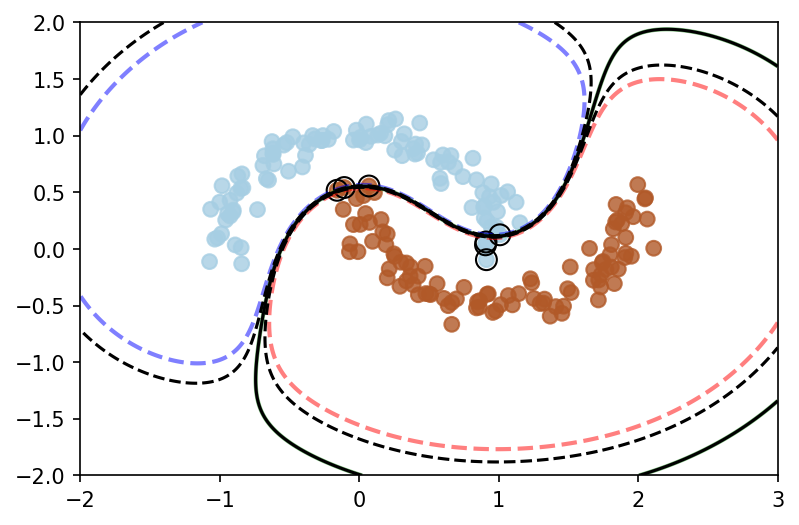

In [100]:
psvm2 = PrimalSVM(kernel='rbf',C=100, learning_rate=1e-3, gamma=2)

psvm2.fit(X2, y2, epochs=201, batch_size=20, show_result=True)

psvm2.visualize([-2, 3], [-2, 2], dpi=150, style=2)

In [102]:
print(psvm2.support_vectors_)

[  8   9  35  40  43  49 128]


# Sample dataset

In [103]:
def load_data(cols):
  iris = sns.load_dataset("iris")
  iris = iris.tail(100)

  le = preprocessing.LabelEncoder()
  yt = le.fit_transform(iris["species"])

  Xt = iris.drop(["species"], axis=1)

  if len(cols) > 0:
    Xt = Xt[cols]

  return Xt.values, yt

cols = ["petal_length", "petal_width"]
X3, y3 = load_data(cols)

y3[y3 == 0] = -1
y3 = np.array([y3])

# scale the data
scaler = StandardScaler()
X3 = scaler.fit_transform(X3)
X3 = X3.T


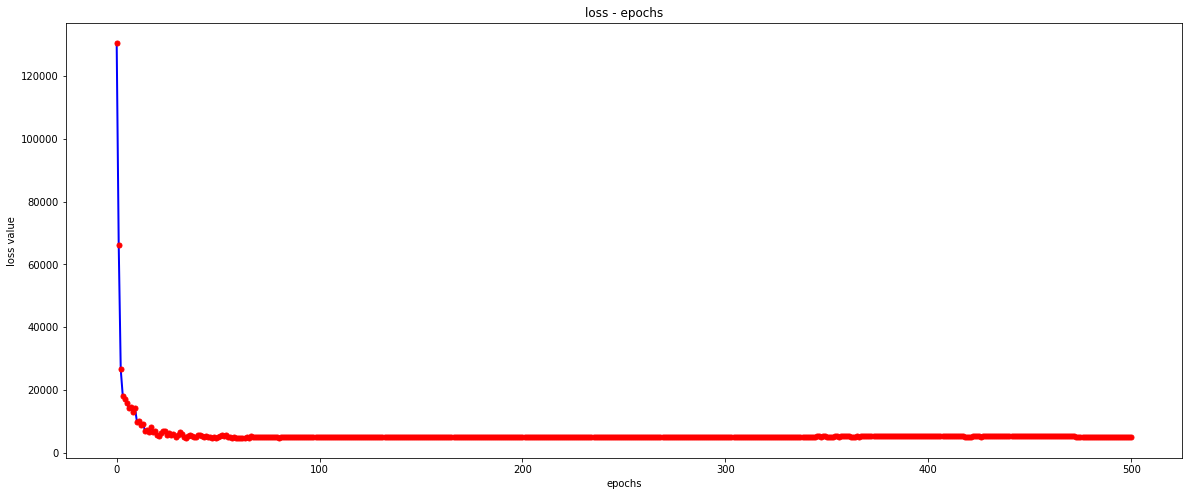

λ.T: 
[[-0.41375721 -0.12267863 -0.33872067 -0.66147045 -0.34834829 -0.58956884
  -0.50187771 -0.5814844  -0.51297306 -0.54298845 -0.6539549  -0.27531701
  -1.03157653 -0.18004189 -0.67831133 -0.32169071 -0.44803871 -1.17997366
  -0.55629384 -0.72407347 -0.76589974 -0.48154668 -0.47245447 -0.56308928
  -0.40606865 -0.6321501  -0.57098661 -0.72766882 -0.25686954 -0.62173475
  -0.97182334 -0.67624193 -0.79198117 -0.60902699 -0.30129365 -0.48917104
  -0.15515512 -0.3408823  -0.72325904 -0.42100956 -0.40207118 -0.38288282
  -0.77701686 -0.73993617 -0.4741147  -0.53516293 -0.28641915 -0.34101142
  -0.58524264 -0.56167743  0.81555335  0.29765565  0.97488415  0.49402292
   0.82517965  1.20170909  0.55308352  1.23339302  0.4052638   0.70516877
   0.47253741  0.22218238  0.55138679  0.56310752  1.00546055  0.77674112
   0.19195361  1.13696479  1.30549935  0.533048    1.19722701  0.32720292
   1.02392878  0.42341939  0.73979204  0.57031307  0.46854056  0.2709168
   0.42106537  0.62389929  0.3031

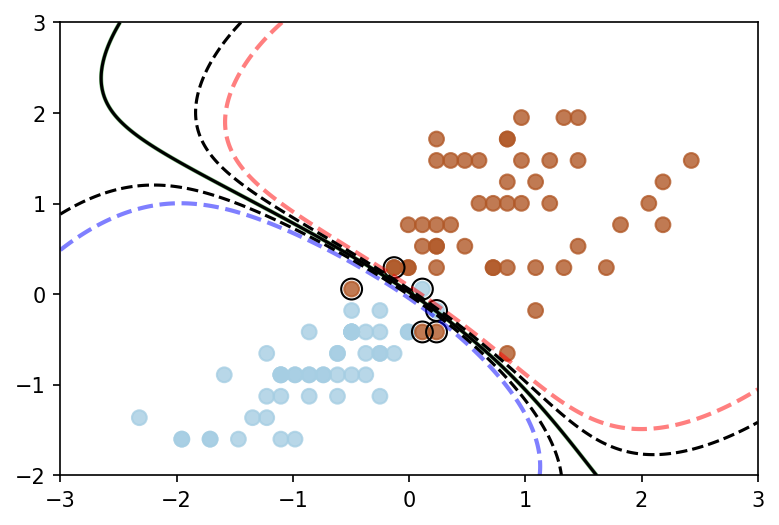

In [104]:
psvm3 = PrimalSVM(kernel='rbf',C = 200,learning_rate=1e-4,  gamma=0.5)
psvm3.fit(X3, y3, epochs=501, batch_size=20, show_result=True)

psvm3.visualize([-3, 3], [-2, 3], dpi=150, style=2)

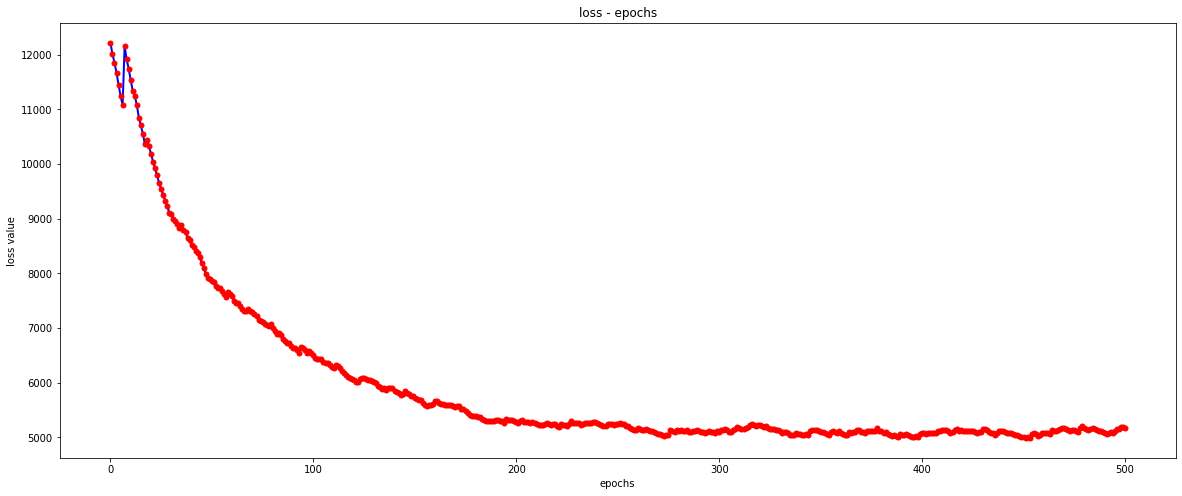

λ.T: 
[[ 4.08854392e-01  6.82536583e-01  8.33941729e-01 -1.63122516e-01
   8.56221937e-02 -2.17784500e-02  5.46448728e-01 -5.66336127e-01
   1.50076123e-03 -6.44167094e-01 -5.61525971e-01  2.61588710e-02
  -5.87423346e-01  4.83035881e-01 -7.57814164e-01  5.98699037e-01
  -6.51364514e-02 -9.73789673e-01  5.83683088e-01 -5.44957964e-01
   6.07587261e-01 -1.24549754e-01  1.05734599e-01 -2.58147635e-01
  -4.34604203e-02  3.34078386e-01  3.19345949e-01  4.33269694e-01
   2.77018416e-01 -6.77974452e-01 -1.16397006e+00 -8.07222313e-01
  -4.71433251e-01  8.34746060e-01  1.08949956e-01  6.50380200e-01
  -2.19276663e-04 -1.85135477e-02 -4.10196508e-01 -4.76977446e-01
  -2.99652121e-01  2.26172477e-01 -6.76199089e-01 -3.00232402e-01
   2.95410018e-01 -6.12211025e-01 -7.00818159e-01 -2.23107908e-01
  -3.36247490e-01  1.16250416e-01  8.53526209e-01  1.17173657e-01
   6.42274312e-01  2.57903214e-01  1.71860437e+00  4.28736908e-01
   1.05676997e-01  9.39846964e-01  5.75821501e-01  4.84378982e-01
   1

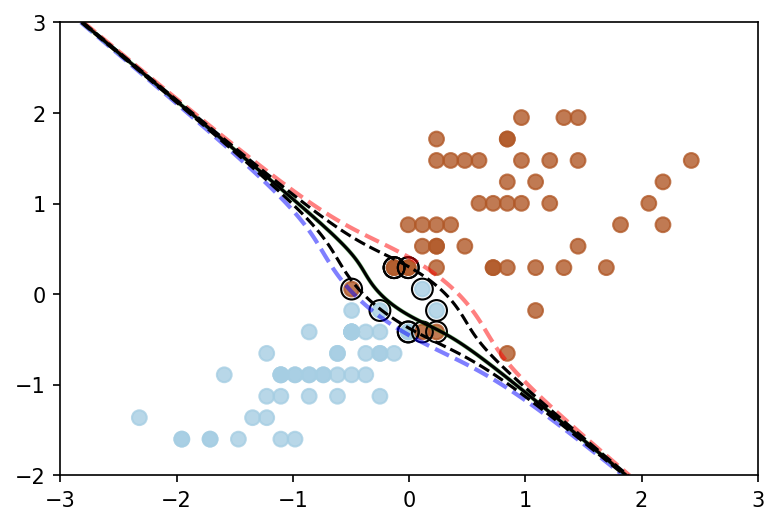

In [105]:
psvm4 = PrimalSVM(kernel='poly',C = 200,learning_rate=1e-4,  gamma=0.5)
psvm4.fit(X3, y3, epochs=501, batch_size=20, show_result=True)

psvm4.visualize([-3, 3], [-2, 3], dpi=150, style=2)

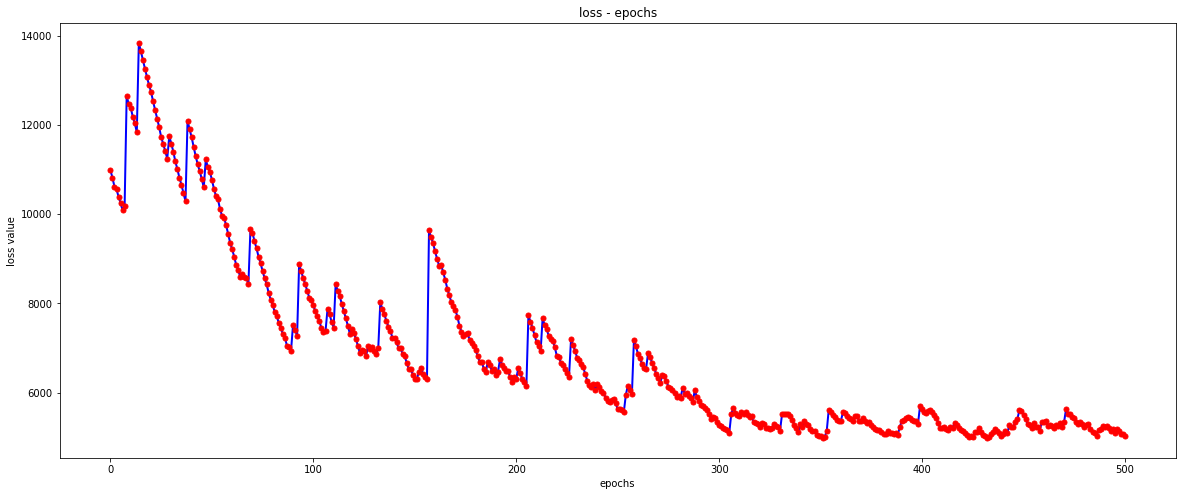

λ.T: 
[[ 0.07523141 -0.18384686 -0.46513527 -0.23523406  0.0330928  -0.22228001
  -0.33641711 -0.13029101 -0.49325402 -0.08151889 -0.12656861 -0.14032676
  -0.05888635 -0.02892143 -0.16663687 -0.26533194 -0.07539591 -0.09809299
  -0.33763984 -0.11111419 -0.23163822 -0.31095167 -0.75219109 -0.18817926
  -0.04074456 -0.32853525 -0.14344725  0.89447439 -0.02607374 -0.16268253
  -0.13968551 -0.11390707 -0.02237636 -0.50718567  0.0624264   0.31471921
   0.16756009 -0.12372195 -0.24961171 -0.05083845 -0.23052281 -0.25136172
  -0.2448332  -0.11687837 -0.33403412 -0.13797638 -0.16336712 -0.12828656
   0.11791264 -0.13634192  0.21362274  0.30651462  0.33924486  0.63412452
   0.29346398  0.05975926  1.5704711   0.05523231  0.27580087  0.20737435
   0.22975659  0.53343902  0.2380905   0.25956302  0.15623236  0.26654665
   0.83261589 -0.00220384  0.00375085  1.39193382  0.18483925  0.52841248
   0.0708674   0.92873932  0.29407986  0.20271522  0.70204066  0.86382554
   0.13491185  0.16134305  0.173

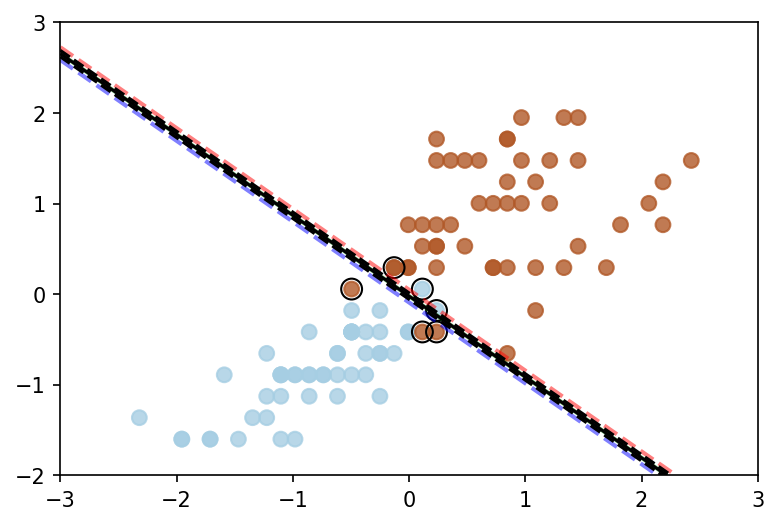

In [106]:
psvm5 = PrimalSVM(kernel='linear',C = 200,learning_rate=1e-4,  gamma=0.5)
psvm5.fit(X3, y3, epochs=501, batch_size=20, show_result=True)

psvm5.visualize([-3, 3], [-2, 3], dpi=150, style=2)

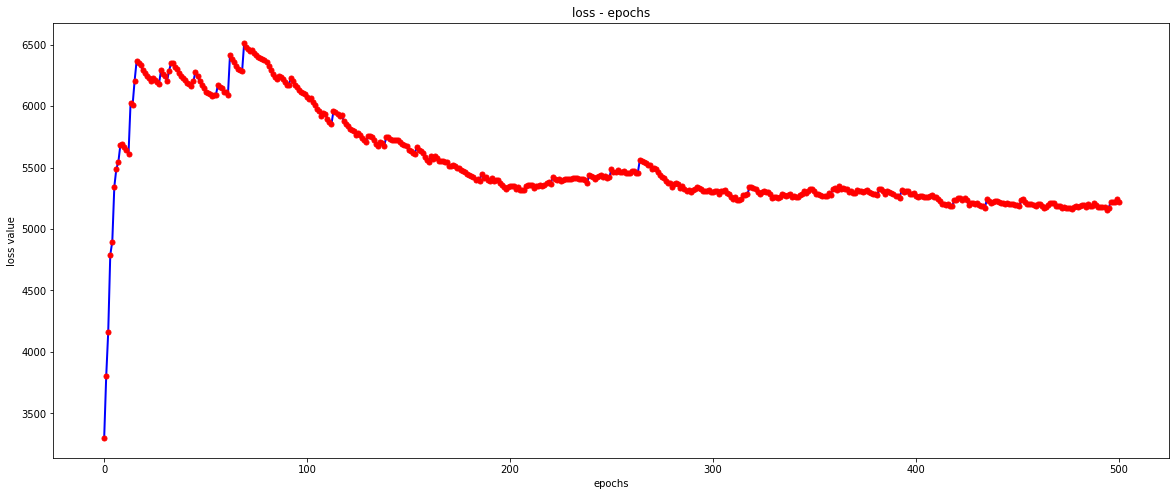

λ.T: 
[[-0.21411625  0.25963684 -0.49377949 -0.0590016  -0.03677751 -0.23731765
  -0.35961226 -0.33701784 -0.16628058  0.05808367 -0.35561062  0.11425187
  -0.37017279 -0.01798723 -0.35174181  0.22270619  0.10122434 -0.24525821
   0.26460549 -0.24432154  0.48558437 -0.02025877 -0.5421443  -0.37613655
  -0.16969938  0.02944337 -0.39338216  0.36566053 -0.33303325 -0.37172135
  -0.30399446 -0.22844744 -0.40820623 -0.20704219 -0.22588579 -0.0440648
   0.02399104 -0.45615445 -0.05493246 -0.53107758 -0.21306891 -0.12517265
  -0.20957769 -0.29032825 -0.28556943 -0.26985289 -0.28501232 -0.05630665
  -0.27573486 -0.28637027  0.3517408   1.25720658  0.56955798  0.61336437
   0.54664577  0.26462072  1.07224186  0.31914518  0.62779756  0.49225334
   0.54750345  0.80264798  0.46233999  0.37181098  0.36738673  0.38065558
   0.798177    0.2420068   0.38716184  0.97617676  0.4871951   0.60475554
   0.35858153  1.09251294  0.45553406  0.71365342  0.84183243  0.26075173
   0.61711469  0.28500907  0.3841

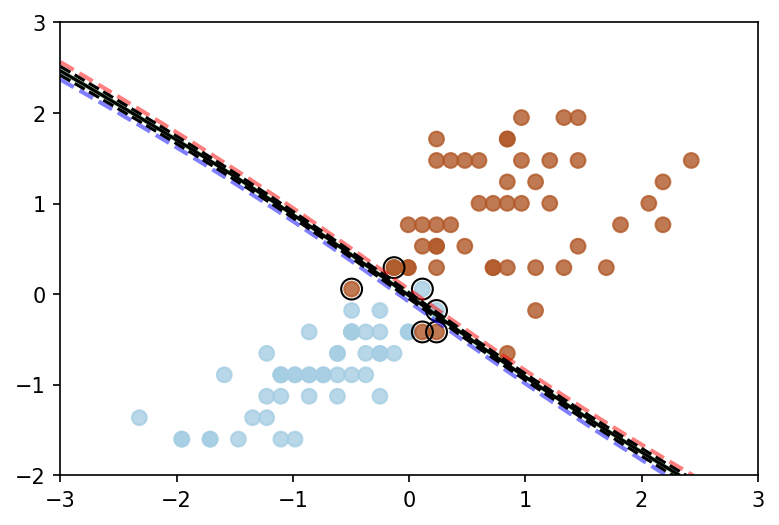

In [107]:
psvm6 = PrimalSVM(kernel='sigmoid',C = 200,learning_rate=1e-4,  gamma=0.5)
psvm6.fit(X3, y3, epochs=501, batch_size=20, show_result=True)

psvm6.visualize([-3, 3], [-2, 3], dpi=150, style=2)